## Imports

In [1]:
#템플릿에 꼭 맞춰야 하는지는 모르겠네요
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import glob
from skimage.feature import hog
import time

## Load Dataset

In [2]:
car_images = []
noncar_images = []

for root, dirs, files in os.walk('./data/vehicles/'):
    for file in files:
        if file.endswith(".png"):
            car_images.append(os.path.join(root, file))
            
for root, dirs, files in os.walk('./data/non-vehicles/'):
    for file in files:
        if file.endswith(".png"):
            noncar_images.append(os.path.join(root, file))

# 참여자 마다 폴더의 위치를 동일하게 해야함

In [3]:
car_images

['./data/vehicles/GTI_Far\\image0000.png',
 './data/vehicles/GTI_Far\\image0001.png',
 './data/vehicles/GTI_Far\\image0002.png',
 './data/vehicles/GTI_Far\\image0003.png',
 './data/vehicles/GTI_Far\\image0004.png',
 './data/vehicles/GTI_Far\\image0005.png',
 './data/vehicles/GTI_Far\\image0006.png',
 './data/vehicles/GTI_Far\\image0007.png',
 './data/vehicles/GTI_Far\\image0008.png',
 './data/vehicles/GTI_Far\\image0009.png',
 './data/vehicles/GTI_Far\\image0010.png',
 './data/vehicles/GTI_Far\\image0014.png',
 './data/vehicles/GTI_Far\\image0015.png',
 './data/vehicles/GTI_Far\\image0016.png',
 './data/vehicles/GTI_Far\\image0018.png',
 './data/vehicles/GTI_Far\\image0019.png',
 './data/vehicles/GTI_Far\\image0021.png',
 './data/vehicles/GTI_Far\\image0022.png',
 './data/vehicles/GTI_Far\\image0023.png',
 './data/vehicles/GTI_Far\\image0024.png',
 './data/vehicles/GTI_Far\\image0027.png',
 './data/vehicles/GTI_Far\\image0029.png',
 './data/vehicles/GTI_Far\\image0030.png',
 './data/ve

In [4]:
noncar_images

['./data/non-vehicles/Extras\\extra1.png',
 './data/non-vehicles/Extras\\extra10.png',
 './data/non-vehicles/Extras\\extra100.png',
 './data/non-vehicles/Extras\\extra1000.png',
 './data/non-vehicles/Extras\\extra1001.png',
 './data/non-vehicles/Extras\\extra1002.png',
 './data/non-vehicles/Extras\\extra1003.png',
 './data/non-vehicles/Extras\\extra1004.png',
 './data/non-vehicles/Extras\\extra1005.png',
 './data/non-vehicles/Extras\\extra1006.png',
 './data/non-vehicles/Extras\\extra1007.png',
 './data/non-vehicles/Extras\\extra1008.png',
 './data/non-vehicles/Extras\\extra1009.png',
 './data/non-vehicles/Extras\\extra101.png',
 './data/non-vehicles/Extras\\extra1010.png',
 './data/non-vehicles/Extras\\extra1011.png',
 './data/non-vehicles/Extras\\extra1012.png',
 './data/non-vehicles/Extras\\extra1013.png',
 './data/non-vehicles/Extras\\extra1014.png',
 './data/non-vehicles/Extras\\extra1015.png',
 './data/non-vehicles/Extras\\extra102.png',
 './data/non-vehicles/Extras\\extra103.png

## Basic Summary of Dataset

In [5]:
#자동차 전체 정답 특성 추출
start = time.time()
for car_image in car_images:
    img = mpimg.imread(car_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_car_feature, hog_car_image = hog(gray, orientations=9, pixels_per_cell=(4,4), 
                                 cells_per_block=(2, 2), block_norm='L2-Hys', 
                                 transform_sqrt=False, visualize = True, 
                                 feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

282.3480sec


In [6]:
# 정답 레이블 생성
hog_car_feature_answer = []
x =1 
hog_car_feature_answer = np.repeat(x, len(car_images))
print(hog_car_feature_answer)

[1 1 1 ... 1 1 1]


In [7]:
# 자동차 오답 전체 특성 추출
start = time.time()
for noncar_image in noncar_images:
    img = cv2.imread(noncar_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_noncar_feature, hog_noncar_image = hog(gray, orientations=9, pixels_per_cell=(4, 4), 
                                cells_per_block=(2, 2), block_norm='L2-Hys',
                                transform_sqrt=False, visualize=True,
                                feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

281.5109sec


In [8]:
# 자동차 오답 레이블 생성
hog_noncar_feature_answer = []
y =0 
hog_noncar_feature_answer = np.repeat(y, len(noncar_images))
print(hog_noncar_feature_answer)

[0 0 0 ... 0 0 0]


## Visualize Some of the Data

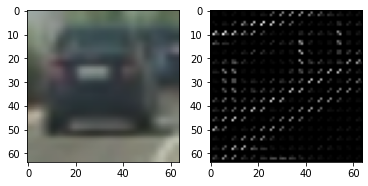

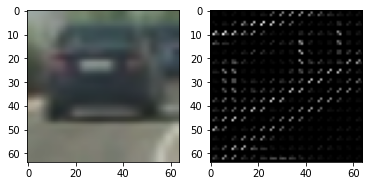

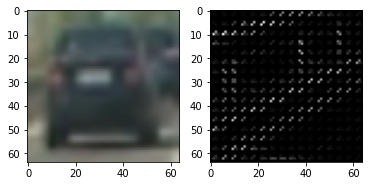

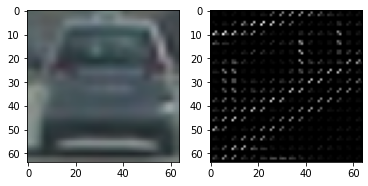

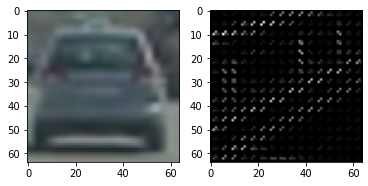

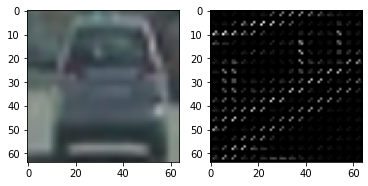

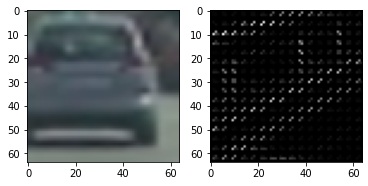

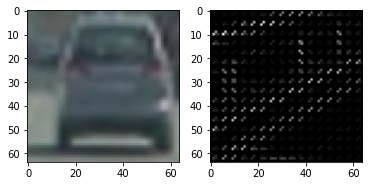

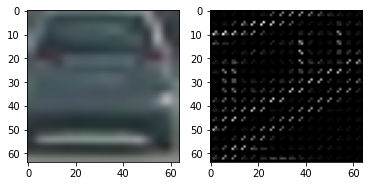

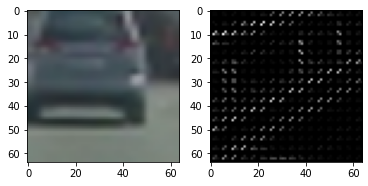

In [9]:
#자동차 맞음
car_images_test = car_images[:10]
# HOG 알고리즘 이용 10개만 선택해서 이미지 시각화
for car_image_show in car_images_test:
    img_show = mpimg.imread(car_image_show)
    gray_show = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_car_feature_show, hog_car_image_show = hog(gray_show, orientations=9, pixels_per_cell=(4,4), 
                                 cells_per_block=(2, 2), block_norm='L2-Hys', 
                                 transform_sqrt=False, visualize = True, 
                                 feature_vector=False)

    #이미지 시각화
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(img_show)

    plt.subplot(122)
    plt.imshow(hog_car_image_show, cmap='gray')

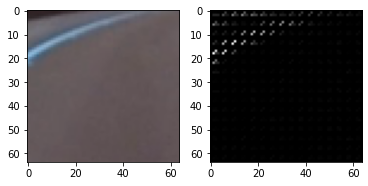

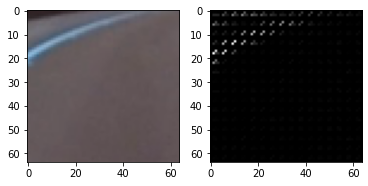

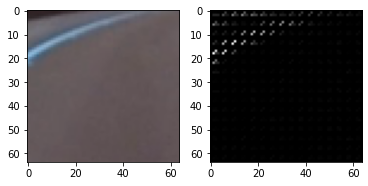

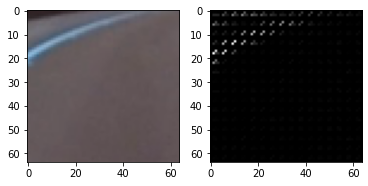

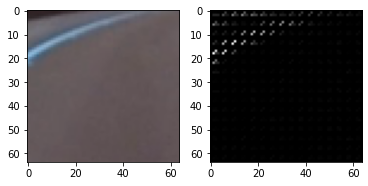

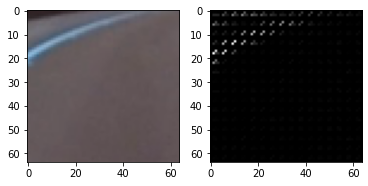

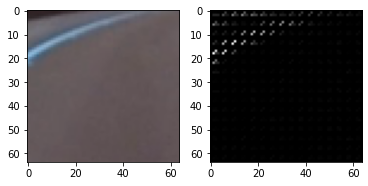

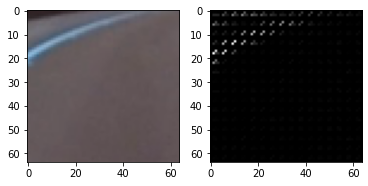

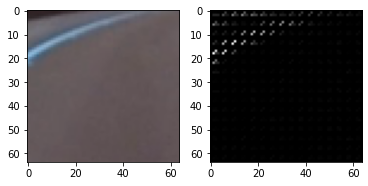

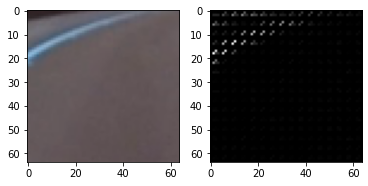

In [10]:
#자동차 아님
noncar_images_test = noncar_images[:10]
#10개만 선택후 이미지 시각화
for noncar_image in noncar_images_test:
    img = cv2.imread(noncar_images[100])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_noncar_feature, hog_noncar_image = hog(gray, orientations=9, pixels_per_cell=(4, 4), 
                                cells_per_block=(2, 2), block_norm='L2-Hys',
                                transform_sqrt=False, visualize=True,
                                feature_vector=False)

    #이미지 시각화
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(img)

    plt.subplot(122)
    plt.imshow(hog_noncar_image, cmap='gray')

## Feature Extraction Method

In [11]:
# Raw pixel intensity : (Color and Shape)
# Histogram of pixel intensity : (Color only)
# Gradients of pixel intensity : (Shape only)

## Feature Extraction

## Data Preparation

In [12]:
train_test_split(X, y)

NameError: name 'train_test_split' is not defined

## Classifier

## Data Saving to Pickle